In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Visualisation lib
import matplotlib.pyplot as plt
# Model lib
from sklearn.linear_model import LinearRegression
# Transformation models
from scipy import stats as stats
from sklearn import preprocessing

In [2]:
# Data retrieval
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [4]:
# Drop this observation
dropped = df.drop([208], axis=0)
np.where(pd.isnull(dropped))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
var = dropped[['salary','exprior','yearsworked','yearsrank','otherqual','position','Field']]
var.head()

,salary,exprior,yearsworked,yearsrank,otherqual,position,Field
0,53000.0,0,0,0,0,1,3
1,58000.0,1,0,0,0,1,2
2,45500.0,0,0,0,0,1,3
3,35782.0,0,2,1,0,1,4
4,34731.0,0,2,2,0,1,4


In [6]:
cat = ['position','Field']
pos_dummies = pd.get_dummies(var.position)
fiel_dummies = pd.get_dummies(var.Field)

# rename column names for the position dummies
names = ['Junior','Manager','Executive']
pos_dummies.columns = names

# rename column names for the Field dummies
names = ['Engineering','Finance','HR','Marketing']
fiel_dummies.columns = names

# print the head of the DF.
print(len(fiel_dummies),"Field dummies")
print(len(pos_dummies), "Position dummies")
print(len(var),"Total rows")

# Merge field dummies and position dummies: dummies;
dummies = pd.concat([pos_dummies, fiel_dummies], axis=1)
dummies.head()

513 Field dummies
513 Position dummies
513 Total rows


,Junior,Manager,Executive,Engineering,Finance,HR,Marketing
0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1


In [7]:
# Merge main df to dummies and remove the pos and field dfs.
clean_main = var.drop(['position','Field'], axis=1)

final = pd.concat([clean_main, dummies], axis=1)

# Print final DF head();
final.head()

,salary,exprior,yearsworked,yearsrank,otherqual,Junior,Manager,Executive,Engineering,Finance,HR,Marketing
0,53000.0,0,0,0,0,1,0,0,0,0,1,0
1,58000.0,1,0,0,0,1,0,0,0,1,0,0
2,45500.0,0,0,0,0,1,0,0,0,0,1,0
3,35782.0,0,2,1,0,1,0,0,0,0,0,1
4,34731.0,0,2,2,0,1,0,0,0,0,0,1


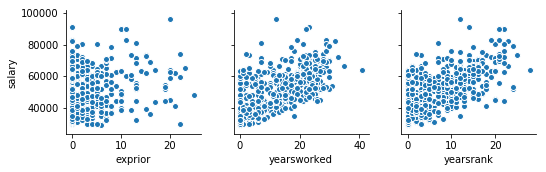

In [8]:
sns.pairplot(final, y_vars=['salary'],x_vars=['exprior','yearsworked','yearsrank'])
plt.show()

In [9]:
final.corr()

,salary,exprior,yearsworked,yearsrank,otherqual,Junior,Manager,Executive,Engineering,Finance,HR,Marketing
salary,1.000000,0.119989,0.623589,0.610706,0.167137,-0.539491,-0.197214,0.677755,0.426059,0.231626,-0.435815,-0.216884
exprior,0.119989,1.000000,-0.245788,-0.065893,0.264655,-0.088265,-0.037850,0.116147,0.053511,0.001509,-0.041037,-0.013669
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.040157,-0.637331,-0.085959,0.662155,0.218146,0.151929,-0.267442,-0.100326
yearsrank,0.610706,-0.065893,0.813456,1.000000,0.007232,-0.400405,-0.082329,0.442687,0.198489,0.170245,-0.241413,-0.124460
otherqual,0.167137,0.264655,-0.040157,0.007232,1.000000,-0.113681,-0.064528,0.164458,0.029562,0.095212,-0.079855,-0.043909
Junior,-0.539491,-0.088265,-0.637331,-0.400405,-0.113681,1.000000,-0.418543,-0.517554,-0.162835,-0.132536,0.220953,0.072746
Manager,-0.197214,-0.037850,-0.085959,-0.082329,-0.064528,-0.418543,1.000000,-0.560481,-0.149545,0.006860,0.114388,0.027661
Executive,0.677755,0.116147,0.662155,0.442687,0.164458,-0.517554,-0.560481,1.000000,0.289379,0.114394,-0.309252,-0.092396
Engineering,0.426059,0.053511,0.218146,0.198489,0.029562,-0.162835,-0.149545,0.289379,1.000000,-0.325581,-0.325581,-0.340997
Finance,0.231626,0.001509,0.151929,0.170245,0.095212,-0.132536,0.006860,0.114394,-0.325581,1.000000,-0.325581,-0.340997


**Training**

------------
train our linear regression model.

In [13]:
final.head(2)

,salary,exprior,yearsworked,yearsrank,otherqual,Junior,Manager,Executive,Engineering,Finance,HR,Marketing
0,53000.0,0,0,0,0,1,0,0,0,0,1,0
1,58000.0,1,0,0,0,1,0,0,0,1,0,0


In [10]:
# Create linear regression model object.
model = LinearRegression()

In [11]:
# Identify the variables
X = final.drop(['salary'], axis=1).reshape(1, -1)
Y = final.salary.reshape(1, -1)

In [12]:
# Fit our data to the model
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Predict
model.coef_

array([  -38.12398245,  -382.11927266,   910.44075061,  1847.42787428,
       -7996.96908317, -1356.04983226,  9353.01891543,  5237.39397861,
        2501.98589059, -4901.58229281, -2837.79757639])

In [26]:
model.intercept_

48254.64404228129

In [27]:
model.predict([53000, 0, 0, 0, 0, 1, 0, 0, 0, 0,1,0])

ValueError: Expected 2D array, got 1D array instead:
array=[53000     0     0     0     0     1     0     0     0     0     1     0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.